# Transformada em Ondeletas

- PET - Fisica UFRN
- Petiano: Gustavo C. A. Vilas Boas
- 21/04/21

O objetivo desse projeto é entender conceitualmente como funciona as transformadas em ondeletas e o porquê de serem uma boa alternativa para contornar as limitações da transformada de Fourier.

## Introdução

Como visto no notebook sobre as transformadas de Fourier, é inegável que essa ferramenta é útil e muito importante em vários casos, porém, ela não é absoluta. Um problema dela é não lidar bem com descontinuidades na função, como é possível ver nos gráficos a seguir.

 ![fourxwav](https://imgur.com/BKwbEeJ.jpg)

Ambas as funções tem ondas de 2Hz, 10Hz e 20Hz, porém a primeira é a onda resultante da soma das três ondas, enquanto a segunda é separada em três pedaços, com o primeiro terço sendo 2Hz, o segundo 10Hz e o terceiro 20Hz. Mas, por causa das descontinuidades, a transformada da segunda função não apresenta um bom resultado, como é possível observar, com bastante ruído.

Outro problema dela é a falta de dependência do tempo, ou seja, ela consegue capturar as frequências presentes na função mas não dá informação sobre quando elas aparecem.

![21020x20102](https://imgur.com/aZ123EH.jpg)

Como podemos observar, as duas curvas são diferentes, a primeira igual à apresentada nos gráficos anteriores e a segunda com uma organização contrária, e mesmo sendo diferentes, a transformada resultante da segunda é muito parecida com a primeira, não dando nenhuma informação sobre quando as frequências aparecem.

Uma forma de contornar esse problema é usando a chamada transformada de Fourier de tempo curto (*Short-time Fourier transform, ou STFT*), que consiste em separar a função em vários pedaços e fazer a transformada em cada pedaço, podendo exibir informações sobre o tempo das frequências. O problema disso é que, de maneira análoga ao princípio de Incerteza de Heisenberg, quanto mais precisão no eixo das frequências, menos no eixo temporal, e vice versa. E isso é um problema, pois para altas frequências, como picos de um abalo sísmico ou de eletrocardiogramas, é necessário uma precisão temporal grande, enquanto para baixas frequências, é mais necessária a precisão na frequência, pois ela exerce sua interferência em um tempo mais longo.

## Ondeletas

Para contornar as limitações de Fourier, foi desenvolvida a transformada em ondeleta. Ela consiste em utilizar uma onda pré-estabelecida, chamada de onda mãe, e variá-la com dois parâmetros, escala e deslocamento em uma determinada função. Nas transformadas de Fourier, são utilizados senos e cossenos, mas na transformada em ondeletas existem vários tipos diferentes de onda.

Tendo em vista a onda mãe $\Psi(t)$, para incluir esses parâmetros, transformamos ela em uma função $\psi(\frac{t-b}{a})$, na qual $\Psi_{a,b}(t) = \frac{1}{\sqrt{a} } \Psi(\frac{t-b}{a})$ ou seja, $a$, chamado de fator de escala (Scale), comprime ou dilata a onda, enquanto $b$, o fator de deslocamento (Shift),  desloca a onda no tempo.

E isso é utilizado seguindo a ideia de que, para preservar uma precisão alta na frequência, necessária para baixas frequências, quanto menos divisões na função a ser analisada, melhor, e para obter uma precisão temporal alta, necessária para altas frequências, quanto mais divisões na função, melhor. Então a transformada acontece em níveis.

![esquema](https://imgur.com/SL0TTR8.jpg)

Um método utilizado para a decomposição de sinais é o chamado *Multiresolution Analysis (MRA)*, que é usada para a transformada discreta em ondeletas. Ela consiste em separar uma função em duas, gerando dois tipos de coeficiente, sendo a para baixas frequências os coeficientes de aproximação e a para altas frequências os coeficientes de detalhes.

![1](https://www.researchgate.net/profile/Krishna-B/publication/263929587/figure/fig7/AS:668298098274309@1536346091279/Diagram-of-multiresolution-analysis-of-signal.png)

Para separar a função, são utilizadas duas funções, a função de escala $\phi (t)$, função de cima, para os coeficientes de aproximação (baixas frequências) e a ondeleta $\psi(t)$, função de baixo, para os coeficientes de detalhes (alta frequência).

![2.1](https://chart.googleapis.com/chart?cht=lc&chs=280x200&chd=e:IZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIaIaIaIaIaIaIaIaIaIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIYIYIYIYIYIYIYIYIZIZIZIZIaIaIaIaIaIbIbIbIcIcIcIcIdIdIdIdIeIeIeIfIfIfIfIgIgIgIgIgIgIgIgIfIfIfIfIeIeIdIdIcIcIcIcIcIcIcIcIcIcIcIcIcIdIdIdIdIdIdIcIbIaIZIYIXIWIVIUITITISIRIQIQIOINIMILIJIIIHIHIFIEIDICIAH.H-H9H-H.IAICIEIFIIIKIMIPIRIUIXIaIdIgIiIlInIqIsIvIxI0I3I5I8I.JCJEJHJKJNJQJTJWJZJdJgJjJmJpJsJvJxJ0J3J5J9KAKEKIKLKPKSKVKZKdKgKjKnKqKuKwKyKyKxKxKwKuKtKrKpKoKmKlKjKhKfKcKZKWKSKOKKKGKDJ.J6J1JwJsJnJiJcJYJVJUJTJTJTJUJVJWJWJVJVJVJVJVJUJUJVJWJXJZJZJaJaJaJbJdJeJfJhJiJjJjJgJaJTJLJEI8IzIpIgIVILIBH2HqHeHTHJHBG5GxGpGhGZGRGJGCF6FyFqFjFbFUFKE.EzEoEbEPECD1DqDhDXDNDEC8CzCrCfCTCGB5BuBjBZBQBEA4AuAkAaAQAHAAACAKAUAgAuA9BOBgByCECXCrDADWDtEFEdE2FPFqGDGeG4HUHxIQIuJNJsKMKtLNLpMCMbMzNLNjN7OSOqPEPdP2QPQoRCRbR1SOSoTCTdT4UTUvVJVjV-WZW0XPXqYGYmZJZsaRa2bacAcmdOd2edfGfvgYhChsiSi3jbj-kilGlqmOmxnUn4oco-pgqDqmrNr3sitNt5umvTwBwqxTx7yjzKzx0Y0-1p2V3C3v4Z5C5p6R677n8P829f-G-t.Q.k.v.3.6.8.8.3.x.r.l.d.U.I-6-r-a-L979q9Y9G8z8g8M717c7D6q6O5z5W464i4L303e3I2x2b2E1s1V080j0LzyzZzAykyIxsxPwxwTv0vWu3uYt5tas6sar6rZq4qWp0pSowoOnrnJmlmBlck4kTjtjIiih.hdg7gZf2fUexeOdsdLcocGbkbDahZ.ZYYvYGXcWxWGVaUuUETcSzSKRhQ5QRPoO-OSNlM4MNLjK6KRJlI5IPHlG6GRFnFAEkEND5DnDXDIC8CwClCaCQCHCAB6B1BxBsBmBhBdBYBVBRBOBNBNBNBOBPBRBTBWBWBWBWBWBWBWBXBXBYBYBZBbBcBdBfBgBkBoBsBxB2B7CBCGCMCSCZCfClCsCzC6C.DDDIDLDPDTDWDaDeDiDmDqDuDyD2D6D-ECEFEJENEREVEZEcEgEkEnErEvEyE2E8FDFJFQFYFfFnFvF3F-GFGNGUGbGjGqGzG7HEHMHUHcHkHsH1H-IGIOIXIfIoIwI1I5I8I-JAJCJEJFJGJHJIJIJJJJJIJIJIJIJIJIJIJIJIJHJHJGJFJEJDJCJAI.I-I9I8I8I7I6I5I4I3I3I2I1I0IzIyIyIwIvItIrIqIoInIlIjIiIgIeIcIaIZIXIWIVIVIVIUIUIUIUIUIUIUIUIUIVIVIVIVIWIWIWIWIWIWIXIXIXIYIYIYIZIZIaIaIaIaIaIaIaIaIaIaIaIaIaIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZIZ&chco=444444&chxt=y,x&chxr=0,-0.182942009625,1.21040865856%7c1,0.0,7.0.png "Função de escala") 
![2.2](https://chart.googleapis.com/chart?cht=lc&chs=280x200&chd=e:lglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglhlhlhlhlhlhlhlhlhlililililililhlhlhlhlglglglflflfleleleleldldlclclclblblblalalalZlZlYlYlYlYlYlYlYlYlYlZlZlZlalalblblclcldldldldldldldldldldlclclclclclclclcldlelflgliljlllmlnlolplqlrlrlslulvlxlzl0l2l3l5l6l8l-l.mBmDmEmFmFmDmCl.l9l6l3l0lxlulrlolklgldlZlVlSlOlLlHlElAk9k5k1kxktkpklkhkdkakWkTkQkNkKkHkEkBj-j8j5j3j1jzjxjujqjnjjjgjdjajWjTjQjNjKjHjEjBi.i-i9i9i9i-i.jBjDjDjDjEjEjEjFjGjHjKjOjTjZjejjjnjsjzj6kAkGkOkVkdkjkkkikfkbkXkSkMkGkBj-j6j3jzjvjsjojjjdjWjQjLjHjEjBi7iziuipijieiZiWicioi2jGjXjoj6kPklk9lVlumKmlnDnfn0oGoWomo3pJpbpsp8qMqdqvq.rPrfrxsOsxtWt9umvQv8wpxQx0yYy8zg0D0m1J102h3R4B4s5U576i7Q8A8s9V-C-s.W.5.9.z.g.F-p-J9k868O7f6w5-5F4K3M2O1a0rz9zPyfxtw7wJvVuhtpsxr6rDqLpRoNnEl6ktjeiNg5fleadRcHa-Z2YuXnWgVMTzSXQ6PkOQM.LtKTI1HfGKExDcCGA6AWAGAAAFAMAYAtBGBgB9CcC9DnEUFEF2GfHFHsITI7JmKQK8LsMfNUOKPAP4QwRqSlThUdVZWZXZYbZdaabVcSdPeKfFf.g7iBjLkYlmmvn3o.qGrUsjtuu4wFxQybzg0L0o0.1P1e1p1u1w101212111v1n1c1R1J1D070z0r0h0Y0Oz.zvzezNy6ynyTx.xuxfxRxDwzwkwVwFv3vovZvKu8uuuguRt-tptTs8snsRr8rmrPq3qgqJpxpapCosodoSoIoAn5nyntnonjnenZnVnRnPnMnKnHnEnCm.m8m6m3m1mzmymymxmxmwmwmwmumqmnmjmfmbmXmSmOmKmGmCl-l6l2lylulqlnlklhlelblYlVlSlPlMlJlGlDlAk-k8k6k4k2k0kykwkvktkskqkpknkmklkjkikhkgkfkekdkckbkbkakZkZkYkYkXkWkWkVkUkUkTkSkSkRkRkQkQkQkPkPkPkOkOkOkOkOkOkNkNkNkNkNkNkNkOkOkOkOkPkPkQkRkRkSkTkUkVkWkXkYkZkakbkckdkekfkgkhkikjklkmknkokpkqkrktkukwkxkzk0k2k4k6k7k9k.lAlClElFlHlJlLlNlPlRlSlUlWlYlalclelglilklllnlololplplqlqlqlrlrlrlrlrlrlrlrlrlrlrlrlrlrlrlrlrlrlqlqlqlqlplplplplolololololnlnlnlnlnlmlmlmlmlmlllllllklkljljljlililhlhlhlglglglflflflflflflflflflflflflflflflflflglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglglg&chco=444444&chxt=y,x&chxr=0,-1.51685990071,1.0699129607%7c1,0.0,7.0.png "Ondeleta")

Um exemplo dessas funções é essa, a Symlet de ordem 4.

## Tipos de ondeletas

Existem vários tipos de ondeletas utilizadas para esse método, com várias propriedades diferentes, como ortogonais, por exemplo a ondeletas Haar (a) e as de Daubechies (c), simétricas, como a gaussiana (b) e a de Morlet (d), utilização de forma discreta ou contínua, além da separação por ordem, que é referente a taxa de decaimento da função, como a gaussiana de primeira ordem e a de Daubechies de quarta ordem, demostradas a seguir.

A utilização de cada uma depende da necessidade de cada aplicação, assim como a proximidade da onda mãe com a função a ser estudada.

![3](https://www.researchgate.net/profile/Jack-Baker-4/publication/241344645/figure/fig1/AS:393262637568009@1470772527480/Common-mother-wavelets-used-for-wavelet-analysis-a-Haar-wavelet-b-Gaussian-wavelet.png)

Um exemplo de seleção de ondeleta é a utilização da Symlet de ordem 4, para análise de eletrocardiogramas (ECG), a função $\phi (t)$ se parece com um cíclo da ECG.

![4](https://www.researchgate.net/profile/Farid_Nait-Abdesselam/publication/305875074/figure/fig1/AS:669076170997773@1536531598766/An-ECG-heart-beat-with-waves-and-segments.png)

## Utilização

A transformada em ondeletas é bastante útil para aplicações como compressão, remoção de ruído, detecção de descontinuidades, entre outras aplicações. 
Uma das aplicações que veremos nesse notebook é a remoção de ruído, que foi vista no notebook anterior sobre Fourier.

Para efeitos de comparação entre a remoção de ruído feita com Fourier anteriormente e com as ondeletas, usaremos o áudio da música Snow (Hey Oh), da banda Red Hot Chilli Peppers, adicionaremos ruído à ela e após isso, faremos os procedimentos para remoção de ruído em ambas as ferramentas.

### Importação de bibliotecas

Utilizaremos as seguintes bibliotecas:
* *Pyplot* para plots de gráficos
* *Numpy* para funções gerais e *Numpy.fft* para as transformadas de Fourier
* *Scipy.io* para leitura do arquivo de áudio
* *Skimage.util* para criação de ruído e *Skimage.restoration* para a remoção de ruído com as ondeletas 

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from numpy.fft import rfft, irfft
import numpy as np
import skimage.restoration as sr
from skimage.util import random_noise

### Leitura e adição de ruído

In [2]:
rate, snow = wav.read('snow.wav') # Leitura
snownorm = snow/max(snow) # Normalização
sigma = 0.02 # Variável para ruído
snow_noisy = random_noise(snownorm, var=sigma**2) # Adição de ruído no áudio
sigma_est = sr.estimate_sigma(snow_noisy, average_sigmas=True) # Estimativa do sigma do ruído

### Remoção de ruído com FFT

In [3]:
rfft_snow = rfft(snow_noisy) # Transformação de Fourier do áudio

# Preparação e execução de laço para remover altas frequências
N = len(rfft_snow)
rfft_snow = np.zeros(N, complex)
pfreq = 0.10 
for i in range(N):
    if i < (pfreq*N):
        rfft_snow[i] = rfft_snow[i]

# Transformada inversa e reversão da normalização anterior
snowfft = irfft(rfft_snow)
snowfft = snowfft*max(snow)

### Remoção de ruído com transformada em ondeleta

Para remover o ruído, utilizaremos a função *denoise_wavelet* da biblioteca *skimate.restoration*, que foi originalmente pensada para remoção de ruído de imagens, como será demonstrado depois, mas também funciona bem para áudios.

In [4]:
snowwavelet = sr.denoise_wavelet(snow_noisy, method='VisuShrink',sigma=sigma_est/3, mode='soft', wavelet='db16',
                                 wavelet_levels=4,  rescale_sigma='True') # Remoção de ruído utilizando a Daubechies 16
snowwavelet = snowwavelet*max(snow) # Reversão da normalização anterior

### Criação dos arquivos de áudio

Criaremos, além dos dois produtos da remoção de ruído, o áudio com ruído, para termos como comparar os resultados.

In [5]:
snow_noisy = snow_noisy*max(snow) # Reversão da normalização
# Escrita dos arquivos de áudio
wav.write('snow_noisy.wav',rate,snow_noisy.astype(np.int16)) 
wav.write('snowfft.wav',rate,snowfft.astype(np.int16))
wav.write('snowwavelet.wav',rate,snowwavelet.astype(np.int16))

Os arquivos para o [áudio original](https://drive.google.com/file/d/1aDlVnHBiDksSnQGYpHhqBqmgV_tm3B6W/view?usp=sharing), [áudio com ruído](https://drive.google.com/file/d/18S_akU3HCskZQDAtGqM_EsdGC8BQLxxQ/view?usp=sharing), [remoção de ruído com FFT](https://drive.google.com/file/d/13dznhyqbNs4d_9t2q2Ip0KHRpaXVW6kx/view?usp=sharing) e [remoção de ruído com ondeleta](https://drive.google.com/file/d/1RKFENRF9oEHV5ylHI2zMq9v9pzDyG3RG/view?usp=sharing) foram upados no Drive.

### Observações

Como é possível perceber, a remoção feita com as ondeletas foi bem efetiva, e ainda melhor que a melhoria simples da FFT.

A remoção de ruído por ondeletas é feita a partir de uma definição de limiares em cada um dos coeficientes resultantes ao ser feita a decomposição do sinal utilizando a *MRA*. São feitas em dois modos, *soft* subtrai esse limiar, tornando nulo o que estiver abaixo dele e diminuindo o sinal no geral, e o *hard* que apenas remove o que está abaixo do limiar.

## Remoção de ruído em imagens e diferença de ondeletas

Como dito anteriormente, existem diversas ondeletas e é importante ter noção de qual utilizar para a finalidade desejada.
Veremos uma comparação entre a remoção de ruído com as ondeletas Haar e Symlet 8.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


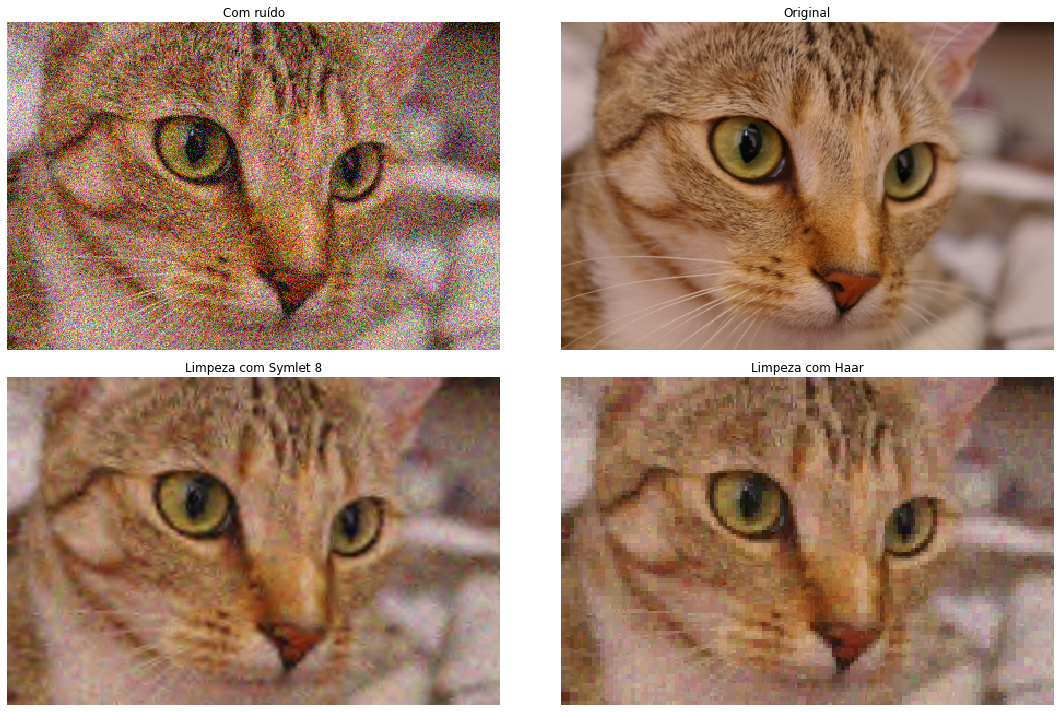

In [6]:
from skimage import data, img_as_float # Importação da biblioteca para utilizarmos a imagem

gato = img_as_float(data.chelsea()) # Importação da imagem 
sigma = 0.155 # Definição do sigma do ruído
gato_sujo = random_noise(gato, var=sigma**2) # Adição de ruído

# Remoção de ruído
gato_sym8 = sr.denoise_wavelet(gato_sujo, wavelet='sym8',convert2ycbcr=True, wavelet_levels=3,multichannel=True, rescale_sigma=True)
gato_haar = sr.denoise_wavelet(gato_sujo, wavelet='haar',convert2ycbcr=True, wavelet_levels=3,multichannel=True, rescale_sigma=True)

# Plot das imagens
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10),
                       sharex=True, sharey=True)
ax[0,0].imshow(gato_sujo)
ax[0,0].axis('off')
ax[0,0].set_title('Com ruído')

ax[0,1].imshow(gato)
ax[0,1].axis('off')
ax[0,1].set_title('Original')

ax[1,0].imshow(gato_sym8)
ax[1,0].axis('off')
ax[1,0].set_title('Limpeza com Symlet 8')

ax[1,1].imshow(gato_haar)
ax[1,1].axis('off')
ax[1,1].set_title('Limpeza com Haar')

fig.tight_layout()

plt.show()

Como é possível perceber, utilizando a ondeleta Haar, a imagem resultante fica muito quadriculada, enquanto utilizando a Symlet 8, temos um aspecto mais suave para a imagem.

## Referências

[1] B, Krishna. (2014). Comparison of Wavelet-Based ANN and Regression Models for Reservoir Inflow Forecasting. Journal of Hydrologic Engineering. 19. 1385. 10.1061/(ASCE)HE.1943-5584.0000892. 

[2] Wavelet Browser by Pywavelets. Disponível em http://wavelets.pybytes.com.

[3] Baker, Jack. (2007). Quantitative Classification of Near-Fault Ground Motions Using Wavelet Analysis. Bulletin of The Seismological Society of America - BULL SEISMOL SOC AMER. 97. 1486-1501. 10.1785/0120060255. 

[4] Hadjem, Medina & Naït-Abdesselam, Farid. (2015). An ECG T-wave Anomalies Detection Using a Lightweight Classification Model for Wireless Body Sensors. 278-283. 10.1109/ICCW.2015.7247191. 

[5] Canal Exploring Technologies - Dr. Ajay Kumar Verma. Disponível em https://www.youtube.com/channel/UCWp7VIBcT1CmuA3qskvb2lg.